In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from nelder_mead import NelderMead # This a library that perfroms Nelder-Mead analysis. It is used to
# fit the Holts-Winters (HW) model.
# The author is https://github.com/owruby.
import HW_functions
# HW_functions are used to fit the HW model and make projections. They were written by Gregory Trubetskoy.
#(https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/)
import HW_model
import HW_functions_multiplicative
import HW_model_multiplicative



In [36]:
#My goal is to see how accurately the HW model can predict the number of urgent calls LAPD recieves on a given 
#day of the week. I chose to do this project largely to become more familiar with the HW model but the findings from this
#analysis might be useful to LAPD. If we accuractely predict the number of urgent calls on a given day of the week 
#then the department can make sure they have enough experienced officers on duty who can handle these calls on duty.


In [3]:
# I decided to train the model on the first two weeks of data in January but I decided to begin the two weeks
# on 01/02/2015 because New Years is an outlier.

calls = pd.read_csv("January_Calls.csv")

In [3]:
series = list(calls['Incident Number'][1:15])

NameError: name 'calls' is not defined

In [4]:
#slen is the length of the season or in this case the length of the week

slen = 7

In [40]:
#I've added the series variable and calls variable to the HW_functions file 

In [41]:
#func is set equal to the function that the Nelder Mead algorithm will try to minimize. The Holts_Winters_Fit function
#returns a residual sum of squares based on the series points and the points generated by the Holts-Winters method.
#params has three elements, one for each smoothing factor in the Holts-Winters model. The tupple is a constraint for 
#for the minimum and maximum values of the smoothing factors.
func = HW_functions.Holts_Winters_Fit
params = {
    "x1": ["real", (0, .9999)],
    "x2": ["real", (0, .9999)],
    "x3": ["real", (0, .9999)],
}

In [42]:
#run 1000 iterations of the Nelder Mead algorithm to find the combination of smooth factors that minimizes RSS.

nm = NelderMead(func, params)
nm.minimize(n_iter=1000)

 Eval |              x1 |              x2 |              x3 |          ObjVal
--------------------------------------------------------------------------------
    0 |         0.18608 |         0.55607 |         0.21563 |       126.81436
    1 |         0.73275 |         0.29831 |         0.04468 |        20.48435
    2 |         0.40755 |         0.53612 |         0.21325 |        62.09955
    3 |         0.81037 |         0.83663 |         0.80575 |       163.67592
    4 |         0.07388 |         0.09038 |        -0.49004 |             inf
    5 |         0.62625 |         0.65006 |         0.48180 |        20.71127
    6 |         0.99163 |         0.43360 |         0.27752 |        62.19041
    7 |         0.79024 |         0.46421 |         0.26205 |        18.00816
    8 |         1.02527 |         0.40560 |         0.31243 |             inf
    9 |         0.56198 |         0.50349 |         0.23804 |        29.83300
   10 |         0.87084 |         0.43823 |         0.28764 |

  180 |         0.99561 |         0.00000 |         0.01315 |         5.53361
  181 |         0.99564 |        -0.00000 |         0.01314 |             inf
  182 |         0.99554 |         0.00000 |         0.01316 |         5.53360
  183 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  184 |         0.99556 |        -0.00000 |         0.01315 |             inf
  185 |         0.99556 |         0.00000 |         0.01316 |         5.53361
  186 |         0.99556 |        -0.00000 |         0.01316 |             inf
  187 |         0.99556 |         0.00000 |         0.01316 |         5.53361
  188 |         0.99557 |        -0.00000 |         0.01316 |             inf
  189 |         0.99556 |         0.00000 |         0.01316 |         5.53361
  190 |         0.99548 |         0.00000 |         0.01318 |         5.53361
  191 |         0.99558 |         0.00000 |         0.01316 |         5.53361
  192 |         0.99554 |         0.00000 |         0.01316 |   

  420 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  421 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  422 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  423 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  424 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  425 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  426 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  427 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  428 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  429 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  430 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  431 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  432 |         0.99551 |         0.00000 |         0.01317 |   

  553 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  554 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  555 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  556 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  557 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  558 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  559 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  560 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  561 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  562 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  563 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  564 |         0.99551 |         0.00000 |         0.01317 |         5.53360
  565 |         0.99551 |         0.00000 |         0.01317 |   

 1099 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1100 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1101 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1102 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1103 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1104 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1105 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1106 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1107 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1108 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1109 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1110 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1111 |         0.99551 |         0.00000 |         0.01317 |   

 1819 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1820 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1821 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1822 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1823 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1824 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1825 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1826 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1827 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1828 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1829 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1830 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 1831 |         0.99551 |         0.00000 |         0.01317 |   

 2789 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2790 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2791 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2792 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2793 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2794 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2795 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2796 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2797 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2798 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2799 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2800 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 2801 |         0.99551 |         0.00000 |         0.01317 |   

 3597 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3598 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3599 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3600 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3601 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3602 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3603 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3604 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3605 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3606 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3607 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3608 |         0.99551 |         0.00000 |         0.01317 |         5.53360
 3609 |         0.99551 |         0.00000 |         0.01317 |   

In [43]:
#0 , .08921, .98476 are parameters that produce the closest fit

In [44]:
#Generate the HW model and make predictions
alpha = 0
beta = .08921
gamma = .98476
n_preds = 14

model_points = HW_model.triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds)

In [45]:
Actual_Calls = calls['Incident Number'][1:29]
x_axis= np.arange(1,29)

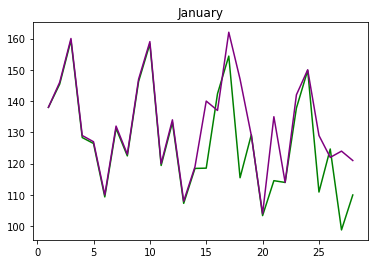

In [46]:

plt.plot(x_axis, model_points, color = 'green')
plt.plot(x_axis, Actual_Calls, color = 'purple')
plt.title("January")
plt.show()

We can see that that the Holts-Winters projection tracks the actual results but on several days its estimate is far off. One Issue is that the HW projection does not account for MLK day on January 19th. Urgent police calls tend to increase during weekend and holidays and the model is not trained to handle non-weekend holidays.

I'll perform same steps as above but this time for a month with no holidays

In [5]:
aug_calls = pd.read_csv("August_Calls.csv")

In [6]:
series = list(aug_calls['Incident Number'][0:21])
series

[173,
 166,
 127,
 149,
 155,
 141,
 139,
 168,
 176,
 146,
 149,
 163,
 123,
 161,
 161,
 187,
 154,
 153,
 150,
 143,
 170]

In [7]:
func = HW_functions.Holts_Winters_Fit
params = {
    "x1": ["real", (0, .9999)],
    "x2": ["real", (0, .9999)],
    "x3": ["real", (0, .9999)],
}
nm = NelderMead(func, params)
nm.minimize(n_iter=1000)

 Eval |              x1 |              x2 |              x3 |          ObjVal
--------------------------------------------------------------------------------
    0 |         0.45414 |         0.07642 |         0.85585 |        16.49221
    1 |         0.66080 |         0.00620 |         0.40488 |        99.49806
    2 |         0.83684 |         0.70906 |         0.13819 |       433.23588
    3 |         0.91095 |         0.83837 |         0.31959 |       941.33214
    4 |         0.39024 |        -0.31059 |         0.61302 |             inf
    5 |         0.78077 |         0.55113 |         0.39295 |       247.21107
    6 |         0.42697 |        -0.28657 |         0.96426 |             inf
    7 |         0.73437 |         0.46015 |         0.34470 |       162.98951
    8 |         0.45210 |        -0.18929 |         0.67734 |             inf
    9 |         0.69861 |         0.36603 |         0.46404 |       116.68788
   10 |         0.47466 |        -0.16106 |         0.80514 |

  138 |         0.37401 |         0.04031 |         0.99581 |         0.52282
  139 |         0.37400 |         0.04029 |         0.99585 |         0.52282
  140 |         0.37403 |         0.04029 |         0.99587 |         0.52281
  141 |         0.37405 |         0.04029 |         0.99585 |         0.52280
  142 |         0.37409 |         0.04028 |         0.99585 |         0.52279
  143 |         0.37412 |         0.04031 |         0.99584 |         0.52279
  144 |         0.37419 |         0.04033 |         0.99584 |         0.52277
  145 |         0.37420 |         0.04030 |         0.99590 |         0.52276
  146 |         0.37430 |         0.04029 |         0.99595 |         0.52274
  147 |         0.37436 |         0.04031 |         0.99589 |         0.52272
  148 |         0.37452 |         0.04032 |         0.99590 |         0.52267
  149 |         0.37459 |         0.04035 |         0.99594 |         0.52268
  150 |         0.37475 |         0.04030 |         0.99602 |   

  304 |         0.93758 |         0.03361 |         0.79920 |         0.32961
  305 |         0.94261 |         0.03368 |         0.78078 |         0.32925
  306 |         0.93732 |         0.03324 |         0.79747 |         0.32855
  307 |         0.93912 |         0.03297 |         0.78872 |         0.32855
  308 |         0.93300 |         0.03329 |         0.79198 |         0.33194
  309 |         0.93710 |         0.03339 |         0.80382 |         0.32948
  310 |         0.95376 |         0.03326 |         0.75210 |         0.33276
  311 |         0.93254 |         0.03339 |         0.81061 |         0.32936
  312 |         0.93908 |         0.03330 |         0.78292 |         0.32829
  313 |         0.94007 |         0.03325 |         0.77248 |         0.32901
  314 |         0.94800 |         0.03324 |         0.75767 |         0.32719
  315 |         0.95574 |         0.03317 |         0.73120 |         0.32928
  316 |         0.94152 |         0.03266 |         0.77209 |   

  516 |         0.98631 |         0.03306 |         0.00078 |         0.32084
  517 |         0.98632 |         0.03306 |         0.00038 |         0.32084
  518 |         0.98634 |         0.03305 |        -0.00092 |             inf
  519 |         0.98631 |         0.03306 |         0.00136 |         0.32084
  520 |         0.98630 |         0.03306 |         0.00069 |         0.32084
  521 |         0.98631 |         0.03306 |        -0.00027 |             inf
  522 |         0.98631 |         0.03306 |         0.00096 |         0.32084
  523 |         0.98630 |         0.03307 |         0.00079 |         0.32084
  524 |         0.98630 |         0.03307 |         0.00029 |         0.32084
  525 |         0.98630 |         0.03308 |        -0.00005 |             inf
  526 |         0.98631 |         0.03306 |         0.00012 |         0.32084
  527 |         0.98631 |         0.03306 |        -0.00021 |             inf
  528 |         0.98632 |         0.03307 |        -0.00016 |   

  690 |         0.98631 |         0.03307 |        -0.00000 |             inf
  691 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  692 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  693 |         0.98631 |         0.03307 |        -0.00000 |             inf
  694 |         0.98631 |         0.03307 |        -0.00000 |             inf
  695 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  696 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  697 |         0.98631 |         0.03307 |        -0.00000 |             inf
  698 |         0.98631 |         0.03307 |        -0.00000 |             inf
  699 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  700 |         0.98631 |         0.03307 |        -0.00000 |             inf
  701 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  702 |         0.98631 |         0.03307 |         0.00000 |   

  964 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  965 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  966 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  967 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  968 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  969 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  970 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  971 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  972 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  973 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  974 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  975 |         0.98631 |         0.03307 |         0.00000 |         0.32084
  976 |         0.98631 |         0.03307 |         0.00000 |   

 1099 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1100 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1101 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1102 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1103 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1104 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1105 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1106 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1107 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1108 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1109 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1110 |         0.98631 |         0.03307 |         0.00000 |         0.32084
 1111 |         0.98631 |         0.03307 |         0.00000 |   

In [50]:
# Params:    0.00000,    0.99987,    0.98262

In [51]:
#Generate the HW model and make predictions
alpha = 0
beta = 0.99987
gamma = 0.98262
n_preds = 14

model_points = HW_model.triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds)

In [8]:
Actual_Calls = aug_calls['Incident Number'][0:28]
x_axis= np.arange(1,29)

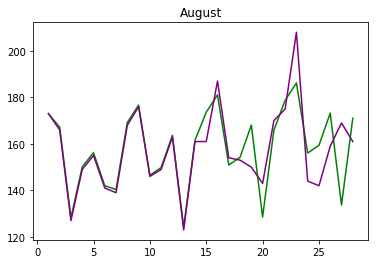

In [53]:
plt.plot(x_axis, model_points, color = 'green')
plt.plot(x_axis, Actual_Calls, color = 'purple')
plt.title("August")
plt.show()

In [9]:
func = HW_functions_multiplicative.Holts_Winters_Fit
params = {
    "x1": ["real", (0, .9999)],
    "x2": ["real", (0, .9999)],
    "x3": ["real", (0, .9999)],
}
nm = NelderMead(func, params)
nm.minimize(n_iter=1000)

 Eval |              x1 |              x2 |              x3 |          ObjVal
--------------------------------------------------------------------------------
    0 |         0.24397 |         0.84441 |         0.86102 |      1354.88810
    1 |         0.83037 |         0.14818 |         0.40718 |       641.98327
    2 |         0.97168 |         0.38295 |         0.31186 |      2542.41998
    3 |         0.14811 |         0.77759 |         0.50604 |       715.71438
    4 |        -0.15672 |         0.79718 |         0.87096 |             inf
    5 |         0.68958 |         0.48650 |         0.45164 |      1090.17763
    6 |         0.86808 |         0.09711 |         0.04889 |        18.67174
    7 |         1.18014 |        -0.27655 |        -0.35717 |             inf
    8 |         0.54146 |         0.19541 |         0.18977 |       236.87952
    9 |         1.34516 |        -0.48379 |        -0.07549 |             inf
   10 |         0.44737 |         0.46225 |         0.36066 |

  136 |         0.98462 |         0.03348 |         0.00099 |         0.91513
  137 |         0.98509 |         0.03377 |         0.00051 |         0.91413
  138 |         0.98567 |         0.03376 |        -0.00004 |             inf
  139 |         0.98488 |         0.03355 |         0.00074 |         0.91452
  140 |         0.98420 |         0.03386 |         0.00103 |         0.91443
  141 |         0.98447 |         0.03396 |         0.00074 |         0.91411
  142 |         0.98533 |         0.03372 |         0.00025 |         0.91361
  143 |         0.98590 |         0.03366 |        -0.00014 |             inf
  144 |         0.98461 |         0.03379 |         0.00060 |         0.91364
  145 |         0.98532 |         0.03347 |         0.00028 |         0.91374
  146 |         0.98543 |         0.03368 |         0.00008 |         0.91309
  147 |         0.98578 |         0.03370 |        -0.00022 |             inf
  148 |         0.98493 |         0.03399 |         0.00034 |   

  313 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  314 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  315 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  316 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  317 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  318 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  319 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  320 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  321 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  322 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  323 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  324 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  325 |         0.98520 |         0.03372 |         0.00000 |   

  754 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  755 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  756 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  757 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  758 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  759 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  760 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  761 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  762 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  763 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  764 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  765 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  766 |         0.98520 |         0.03372 |         0.00000 |   

  871 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  872 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  873 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  874 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  875 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  876 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  877 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  878 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  879 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  880 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  881 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  882 |         0.98520 |         0.03372 |         0.00000 |         0.91260
  883 |         0.98520 |         0.03372 |         0.00000 |   

 1123 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1124 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1125 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1126 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1127 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1128 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1129 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1130 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1131 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1132 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1133 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1134 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1135 |         0.98520 |         0.03372 |         0.00000 |   

 1287 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1288 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1289 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1290 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1291 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1292 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1293 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1294 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1295 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1296 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1297 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1298 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1299 |         0.98520 |         0.03372 |         0.00000 |   

 1458 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1459 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1460 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1461 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1462 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1463 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1464 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1465 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1466 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1467 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1468 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1469 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1470 |         0.98520 |         0.03372 |         0.00000 |   

 1631 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1632 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1633 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1634 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1635 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1636 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1637 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1638 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1639 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1640 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1641 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1642 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1643 |         0.98520 |         0.03372 |         0.00000 |   

 1859 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1860 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1861 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1862 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1863 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1864 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1865 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1866 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1867 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1868 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1869 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1870 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 1871 |         0.98520 |         0.03372 |         0.00000 |   

 2086 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2087 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2088 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2089 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2090 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2091 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2092 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2093 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2094 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2095 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2096 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2097 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2098 |         0.98520 |         0.03372 |         0.00000 |   

 2287 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2288 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2289 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2290 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2291 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2292 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2293 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2294 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2295 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2296 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2297 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2298 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2299 |         0.98520 |         0.03372 |         0.00000 |   

 2665 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2666 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2667 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2668 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2669 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2670 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2671 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2672 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2673 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2674 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2675 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2676 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2677 |         0.98520 |         0.03372 |         0.00000 |   

 2983 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2984 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2985 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2986 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2987 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2988 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2989 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2990 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2991 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2992 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2993 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2994 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 2995 |         0.98520 |         0.03372 |         0.00000 |   

 3369 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3370 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3371 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3372 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3373 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3374 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3375 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3376 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3377 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3378 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3379 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3380 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3381 |         0.98520 |         0.03372 |         0.00000 |   

 3604 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3605 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3606 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3607 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3608 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3609 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3610 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3611 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3612 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3613 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3614 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3615 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3616 |         0.98520 |         0.03372 |         0.00000 |   

 3769 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3770 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3771 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3772 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3773 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3774 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3775 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3776 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3777 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3778 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3779 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3780 |         0.98520 |         0.03372 |         0.00000 |         0.91260
 3781 |         0.98520 |         0.03372 |         0.00000 |   

In [11]:
alpha = 0.00514
beta = 0.99988
gamma = 0.99990
n_preds = 7

model_points = HW_model_multiplicative.triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds)

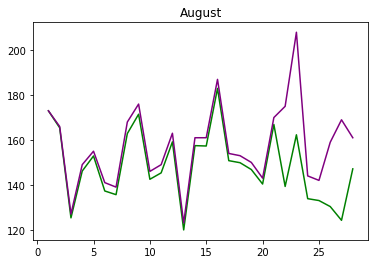

In [12]:
plt.plot(x_axis, model_points, color = 'green')
plt.plot(x_axis, Actual_Calls, color = 'purple')
plt.title("August")
plt.show()

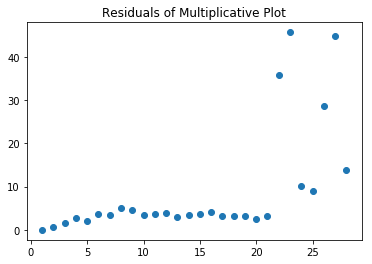

In [15]:
plt.scatter(x_axis, Actual_Calls - model_points)
plt.title("Residuals of Multiplicative Plot")
plt.show()

I orignally decided to try using the multiplicative model in August because the "amplitude" of the seasons seemed to be rising at a constant rate. After looking at the data more closely I can see that the ampitude is not actually increasing until the third season. Perhaps the the inconsistent changes in the amplitude is making this method a poor predictor for urgent crimes in August.